In [ ]:
import csv
import random
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


LOADING THE DATASET

In [ ]:
columns = ['Age', 'Spectacle prescription', 'Astigmatic', 'Tear production rate', 'Class_labels']
df = pd.read_csv('lenses.csv', names = columns)
df.head(10)

,Age,Spectacle prescription,Astigmatic,Tear production rate,Class_labels
0,1,1,1,1,No-contact-lenses
1,1,1,1,2,Soft-contact-lenses
2,1,1,2,1,No-contact-lenses
3,1,1,2,2,Hard-contact-lenses
4,1,2,1,1,No-contact-lenses
5,1,2,1,2,Soft-contact-lenses
6,1,2,2,1,No-contact-lenses
7,1,2,2,2,Hard-contact-lenses
8,2,1,1,1,No-contact-lenses
9,2,1,1,2,Soft-contact-lenses


VISUALIZATION OF THE DATASET

In [ ]:
df.describe()

,Age,Spectacle prescription,Astigmatic,Tear production rate
count,24.000000,24.000000,24.000000,24.000000
mean,2.000000,1.500000,1.500000,1.500000
std,0.834058,0.510754,0.510754,0.510754
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.500000,1.500000,1.500000
75%,3.000000,2.000000,2.000000,2.000000
max,3.000000,2.000000,2.000000,2.000000


Check for missing values in the data

In [ ]:
print(df.isnull().sum())

Age                       0
Spectacle prescription    0
Astigmatic                0
Tear production rate      0
Class_labels              0
dtype: int64


Check for outliers in the data:

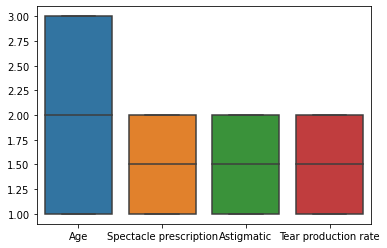

In [ ]:
import seaborn as sns
sns.boxplot(data=df)

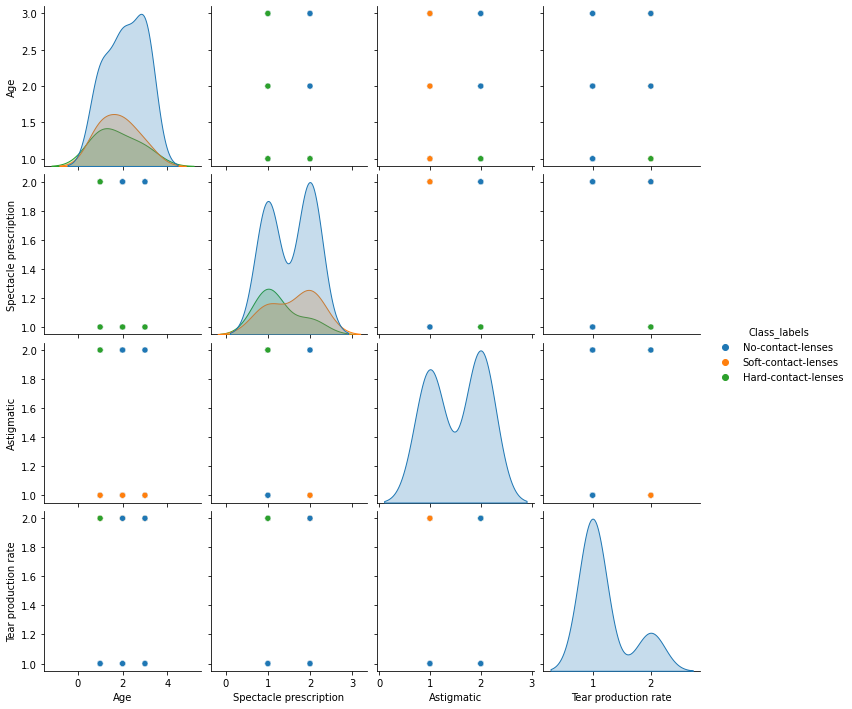

In [ ]:
sns.pairplot(df, hue='Class_labels')

SEPARATING INPUT COLUMNS AND THE OUTPUT COLUMN

In [ ]:
data = df.values

X = data[:,0:4]
Y = data[:,4]
print(X)
print(Y)




NameError: ignored

SPLITTING THE DATA INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5)
print("X train data set \n")
print(X_train)
print("\n X test data set \n")
print(X_test)
print("\n y train data set \n")
print(y_train)
print("\n y test data set \n")
print(y_test)

X train data set 

[[1 1 1 1]
 [2 2 2 2]
 [2 1 1 2]
 [1 2 2 1]
 [3 2 2 2]
 [3 1 1 1]
 [2 2 1 1]
 [3 2 1 2]
 [1 1 2 2]
 [2 1 1 1]
 [2 1 2 1]
 [3 2 1 1]]

 X test data set 

[[3 1 2 1]
 [3 2 2 1]
 [1 1 2 1]
 [3 1 2 2]
 [2 1 2 2]
 [1 2 1 1]
 [1 2 2 2]
 [2 2 1 2]
 [3 1 1 2]
 [1 1 1 2]
 [1 2 1 2]
 [2 2 2 1]]

 y train data set 

['No-contact-lenses' 'No-contact-lenses' 'Soft-contact-lenses'
 'No-contact-lenses' 'No-contact-lenses' 'No-contact-lenses'
 'No-contact-lenses' 'Soft-contact-lenses' 'Hard-contact-lenses'
 'No-contact-lenses' 'No-contact-lenses' 'No-contact-lenses']

 y test data set 

['No-contact-lenses' 'No-contact-lenses' 'No-contact-lenses'
 'Hard-contact-lenses' 'Hard-contact-lenses' 'No-contact-lenses'
 'Hard-contact-lenses' 'Soft-contact-lenses' 'No-contact-lenses'
 'Soft-contact-lenses' 'Soft-contact-lenses' 'No-contact-lenses']


MODEL 1: Support Vector Machine Algorithm (SVM)

In [ ]:
from sklearn.svm import SVC
model_svc = svm.SVC()
model_svc.fit(X_train, y_train)

SVC()

In [ ]:
prediction1 = model_svc.predict(X_test)
# Calculate how well we performed
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction1)*100)

50.0


MODEL 2: Perceptron Algorithm

In [ ]:
model_Perceptron = Perceptron()
model_Perceptron.fit(X_train, y_train)


Perceptron()

In [ ]:
prediction2 = model_Perceptron.predict(X_test)
# Calculate how well we performed
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction2)*100)

75.0


MODEL 3: Gaussian Naive Bayes

In [ ]:
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
prediction3 = model_GaussianNB.predict(X_test)
# Calculate how well we performed
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction3)*100)

66.66666666666666


MODEL 4: K-Nearest Neighbor Algorithm (KNN)


In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors = 1)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
prediction4 = model_KNN.predict(X_test)
# Calculate how well we performed
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction4)*100)

41.66666666666667


In [ ]:
svm = SVC(max_iter = 1000, random_state = 42)
svm.fit(X_train, y_train)

y_test_predicted = svm.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_predicted)*100)

50.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

                     precision    recall  f1-score   support

Hard-contact-lenses       0.00      0.00      0.00         3
  No-contact-lenses       0.50      1.00      0.67         6
Soft-contact-lenses       0.00      0.00      0.00         3

           accuracy                           0.50        12
          macro avg       0.17      0.33      0.22        12
       weighted avg       0.25      0.50      0.33        12



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction2))

                     precision    recall  f1-score   support

Hard-contact-lenses       1.00      0.33      0.50         3
  No-contact-lenses       0.83      0.83      0.83         6
Soft-contact-lenses       0.60      1.00      0.75         3

           accuracy                           0.75        12
          macro avg       0.81      0.72      0.69        12
       weighted avg       0.82      0.75      0.73        12



DETAILED CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction3))

                     precision    recall  f1-score   support

Hard-contact-lenses       0.00      0.00      0.00         3
  No-contact-lenses       0.62      0.83      0.71         6
Soft-contact-lenses       0.75      1.00      0.86         3

           accuracy                           0.67        12
          macro avg       0.46      0.61      0.52        12
       weighted avg       0.50      0.67      0.57        12



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction4))

                     precision    recall  f1-score   support

Hard-contact-lenses       0.00      0.00      0.00         3
  No-contact-lenses       0.45      0.83      0.59         6
Soft-contact-lenses       0.00      0.00      0.00         3

           accuracy                           0.42        12
          macro avg       0.15      0.28      0.20        12
       weighted avg       0.23      0.42      0.29        12



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_new = np.array([[1,2,2,2], [2,1,1,2], [3,2,2,1]])
# Prediction of the class from the input vector
prediction = model_svc.predict(X_new)
print("Contact Lens Prescription: {}".format(prediction))

Contact Lens Prescription: ['No-contact-lenses' 'No-contact-lenses' 'No-contact-lenses']


In [ ]:
model_svc.classes_

array(['Hard-contact-lenses', 'No-contact-lenses', 'Soft-contact-lenses'],
      dtype=object)

In [ ]:
cm = confusion_matrix(y_test, y_test_predicted, labels = model_svc.classes_)
print(cm)

[[0 3 0]
 [0 6 0]
 [0 3 0]]


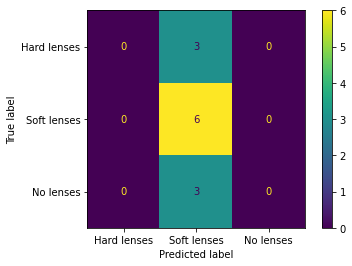

In [ ]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Hard lenses', 'Soft lenses', 'No lenses'])
cm_disp.plot()

[[0 3 0]
 [0 6 0]
 [0 3 0]]


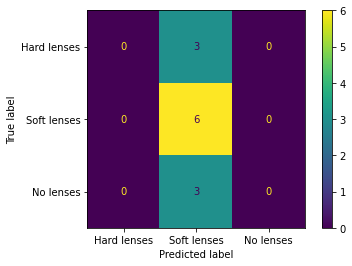

In [ ]:
cm = confusion_matrix(y_test, prediction1, labels = model_svc.classes_)
print(cm)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Hard lenses', 'Soft lenses', 'No lenses'])
cm_disp.plot()

[[1 1 1]
 [0 5 1]
 [0 0 3]]


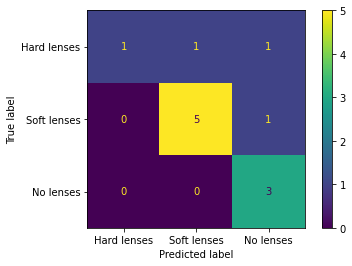

In [ ]:
cm = confusion_matrix(y_test, prediction2, labels = model_svc.classes_)
print(cm)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Hard lenses', 'Soft lenses', 'No lenses'])
cm_disp.plot()

[[0 3 0]
 [0 5 1]
 [0 0 3]]


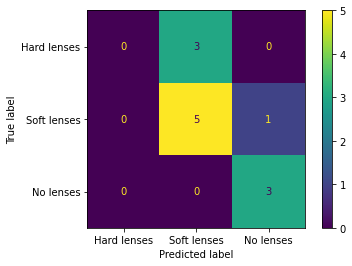

In [ ]:
cm = confusion_matrix(y_test, prediction3, labels = model_svc.classes_)
print(cm)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Hard lenses', 'Soft lenses', 'No lenses'])
cm_disp.plot()

[[0 3 0]
 [0 5 1]
 [0 3 0]]


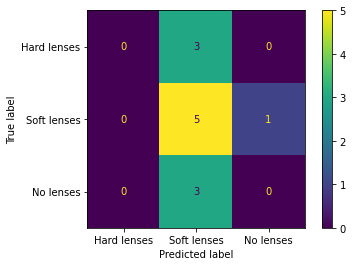

In [ ]:
cm = confusion_matrix(y_test, prediction4, labels = model_svc.classes_)
print(cm)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Hard lenses', 'Soft lenses', 'No lenses'])
cm_disp.plot()

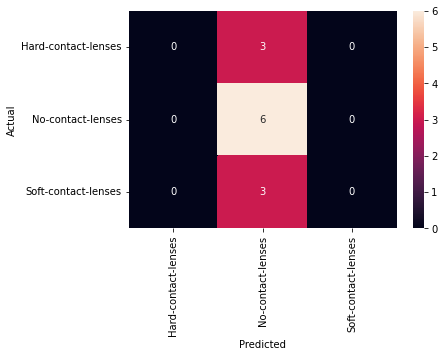

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, prediction1, labels = model_svc.classes_)
df_cm = pd.DataFrame(cm, index = model_svc.classes_, columns = model_svc.classes_)
sns.heatmap(df_cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


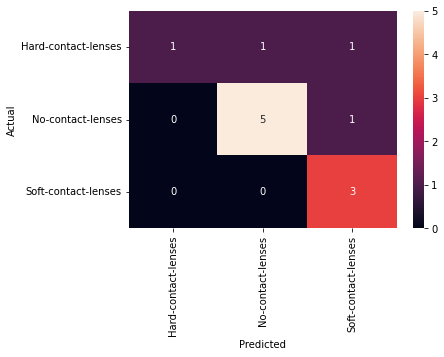

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, prediction2, labels = model_svc.classes_)
df_cm = pd.DataFrame(cm, index = model_svc.classes_, columns = model_svc.classes_)
sns.heatmap(df_cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


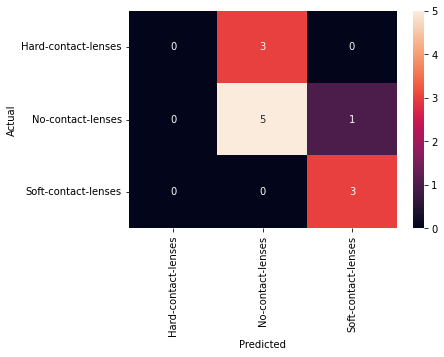

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, prediction3, labels = model_svc.classes_)
df_cm = pd.DataFrame(cm, index = model_svc.classes_, columns = model_svc.classes_)
sns.heatmap(df_cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


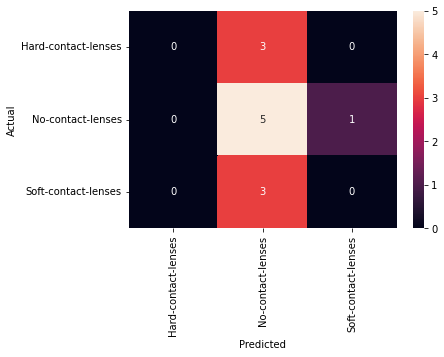

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, prediction4, labels = model_svc.classes_)
df_cm = pd.DataFrame(cm, index = model_svc.classes_, columns = model_svc.classes_)
sns.heatmap(df_cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

model = SVC()
scores = cross_val_score(model, X, Y, cv = 5)

print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))


Cross-validation scores: [0.8  0.6  0.6  0.8  0.75]
Mean score: 0.71


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

model = Perceptron()
scores = cross_val_score(model, X, Y, cv = 5)

print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))


Cross-validation scores: [0.8  0.8  0.6  0.6  0.75]
Mean score: 0.7100000000000001


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

model = GaussianNB()
scores = cross_val_score(model, X, Y, cv = 5)

print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))


Cross-validation scores: [1.   0.8  0.8  0.8  0.75]
Mean score: 0.8300000000000001


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors = 1)
scores = cross_val_score(model, X, Y, cv = 5)

print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))





Cross-validation scores: [0.8 1.  0.8 0.8 1. ]
Mean score: 0.8800000000000001


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
# Load the trained SVM model
model_svc = SVC()

# Print the hyperparameters of the model
print(model_svc.get_params())
print(model_svc.kernel)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
rbf
